In [1]:
import os
import numpy as np
import pandas as pd
from utils import CONDITIONS
import matplotlib.pyplot as plt
os.environ['KMP_DUPLICATE_LIB_OK']='True'

no_reduction = { # From baseline.ipynb
    'val': {
        'F1': {
            'Macro': 0.572204,
            'Micro': 0.641672,
        },
        'Recall': {
            'Macro': 0.564656,
            'Micro': 0.634371,
        },
        'Precision': {
            'Macro': 0.582714,
            'Micro': 0.649143,
        },
    },
    'test': {
        'F1': {
            'Macro': 0.536325,
            'Micro': 0.597539,
        },
        'Recall': {
            'Macro': 0.524098,
            'Micro': 0.581012,
        },
        'Precision': {
            'Macro': 0.559891,
            'Micro': 0.615033,
        },
    },
}

In [2]:
def process_into_df(data_split):
    dirs = os.listdir('results')
    d = {}
    indices = []
    for filename in dirs:
        if filename.split('_')[1] == data_split:
            df = pd.read_csv('results/' + filename)
            df.index = pd.Index(CONDITIONS + ['Macro', 'Micro'])
            filename = filename.replace('.csv', '')
            split = filename.split('_')
            model_name = split[0]
            seed = split[-1]
            dim = split[-2]

            # Append dict
            # if dim not in d.keys():
            #     d[dim] = {}
            
            # d[dim][seed] = df
            idx = (model_name, dim, seed)
            d[idx] = df

    
    # df =  pd.DataFrame.from_dict({(i,j): d[i][j] 
    #                        for i in d.keys() 
    #                        for j in d[i].keys()},
    #                    orient='index')
    df = pd.concat(d)
    df = df.reset_index()
    df.columns = pd.Index(['ModelName', 'Dim', 'Seed', 'Diagnosis'] + list(df.columns)[4:])
    df['Dim'] = df['Dim'].astype(int)
    df = df.sort_values(by=['Dim', 'Seed'])
    return df

In [49]:
def visualize_new(data_split, metric, kind):
    data_split = data_split.lower()
    metric = metric[0].upper() + metric[1:].lower()
    kind = kind[0].upper() + kind[1:].lower()
    baseline = no_reduction[data_split][metric][kind]
    df = process_into_df(data_split)
    model_names = df['ModelName'].unique()
    plt.figure(figsize=(12, 8))
    ax = plt.axes()
    for model_name in model_names:
        df = process_into_df(data_split)
        to_plot = df[(df['Diagnosis'] == kind) & (df['ModelName'] == model_name)].groupby('Dim').agg({
            metric: ['mean', 'max', 'min']
        })
        for idx in to_plot:
            cur_metric = idx[-1]
            if cur_metric == 'mean':
                linestyle = 'solid'
                marker = 's'
            else:
                linestyle = 'dotted'
                marker = 'None'
            ax.plot(
                to_plot[idx], 
                label=f"{model_name}_{cur_metric}",
                linestyle=linestyle,
                marker=marker,
            )
        

    ax.plot(2**np.arange(7, 14), [baseline]*7, '-.k', label='No dim reduction')
    ax.legend()
    plt.title(f"{kind} {metric} on {data_split} split")
    plt.xticks(df['Dim'].unique(), rotation=90)
    ax.plot(ax=ax)
    plt.show()


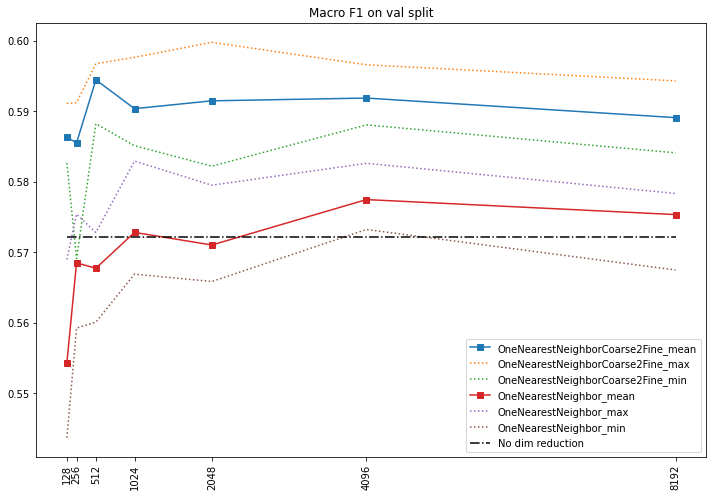

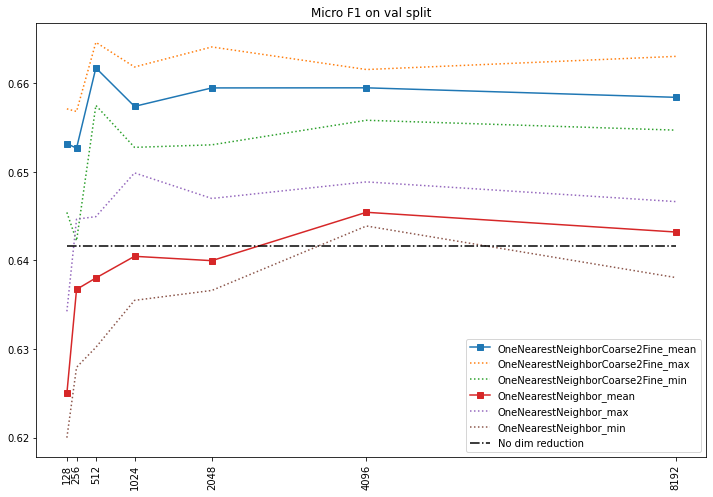

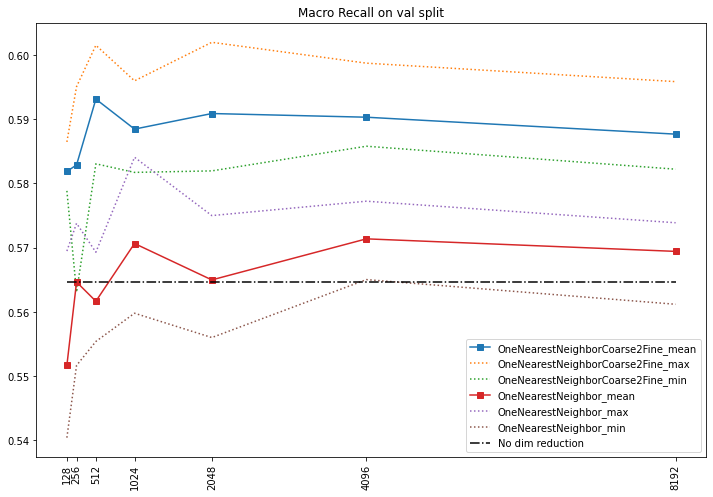

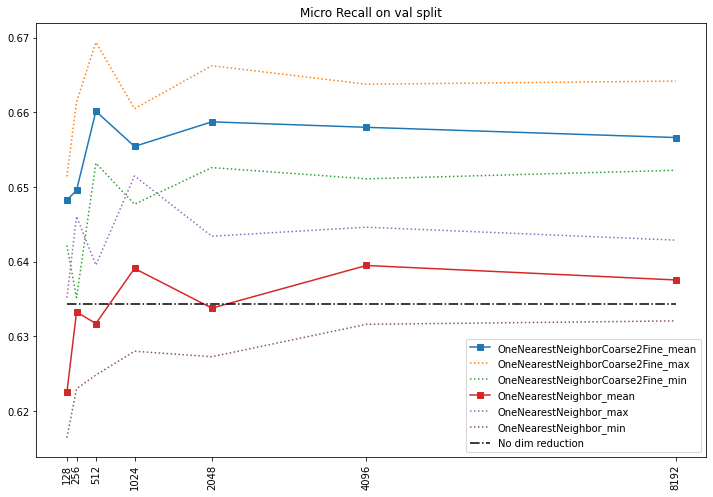

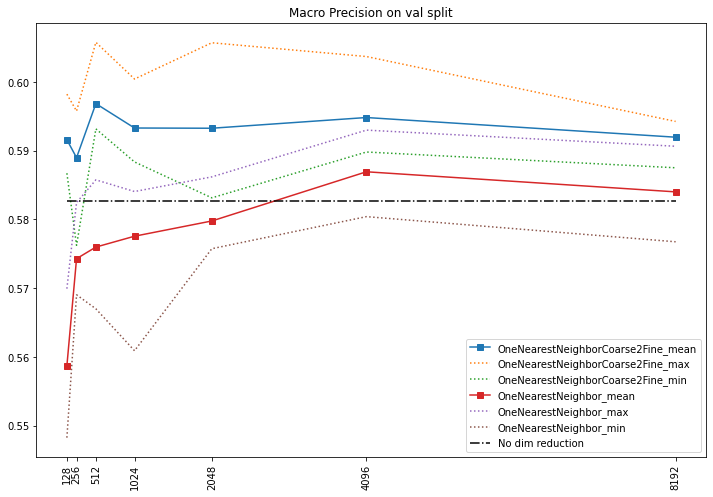

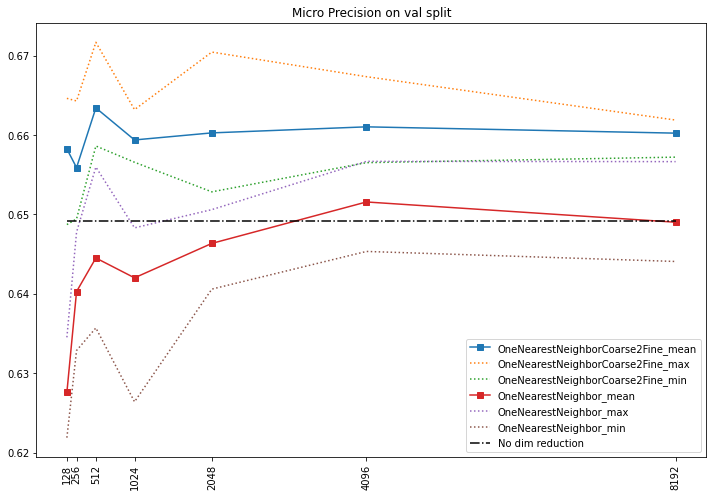

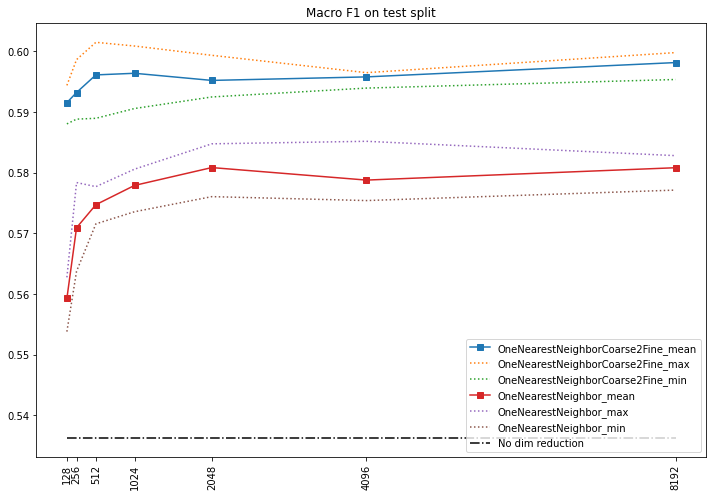

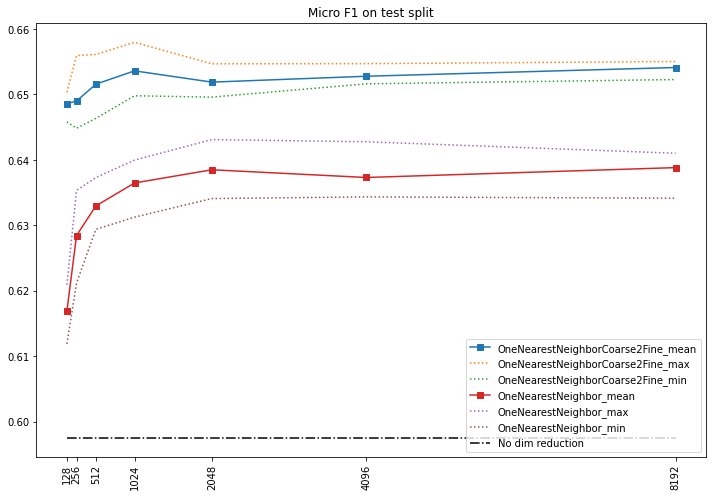

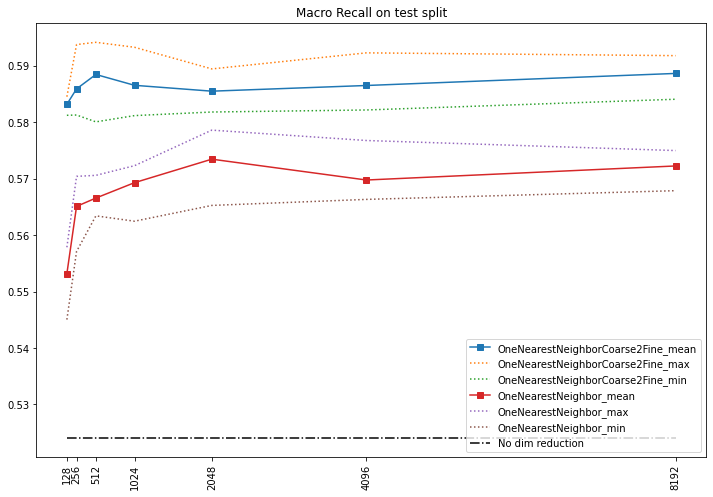

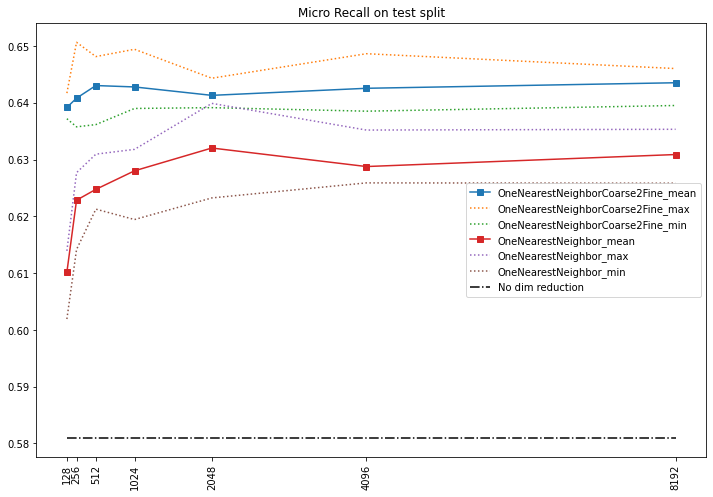

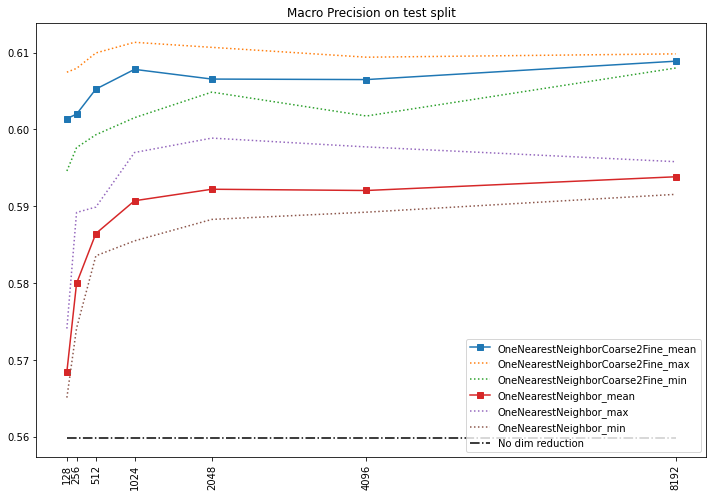

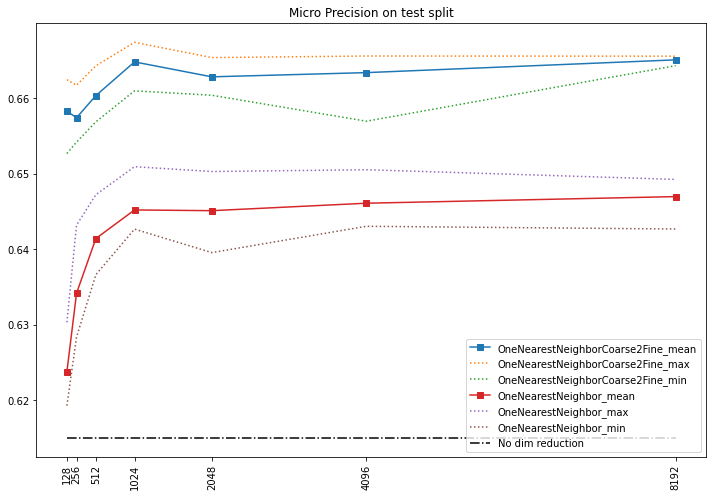

In [51]:
for split in ['val', 'test']:
    for metric in ['F1', 'Recall', 'Precision']:
        for kind in ['Macro', 'Micro']:
            visualize_new(split, metric, kind)
            # print(split, kind, metric)
    #         break
    #     break
    # break

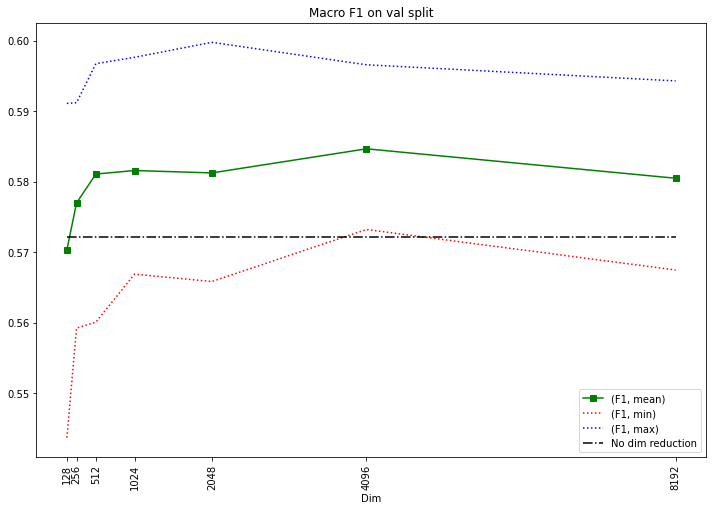

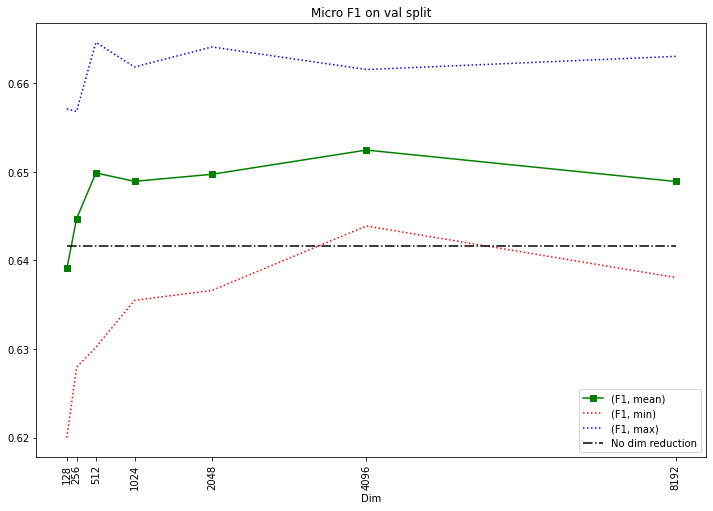

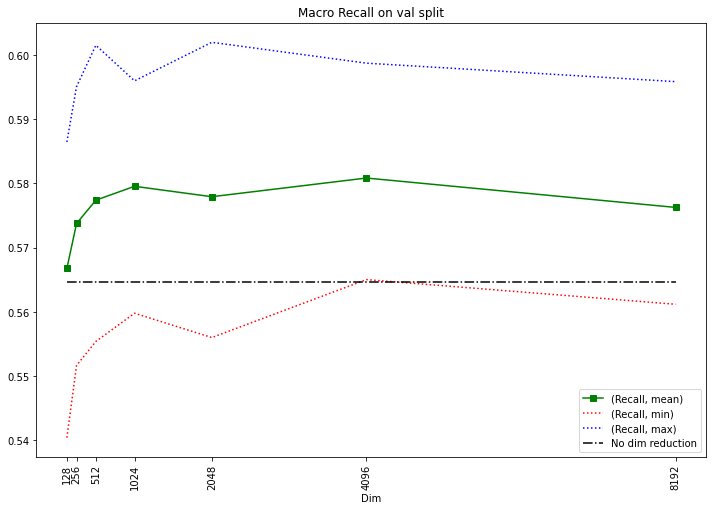

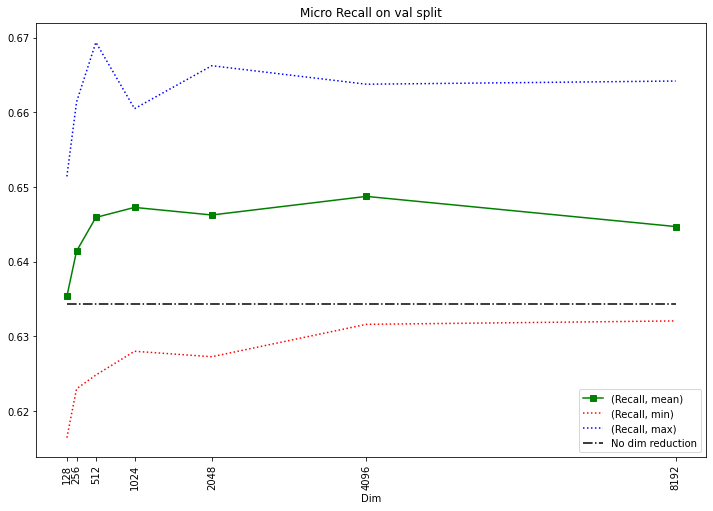

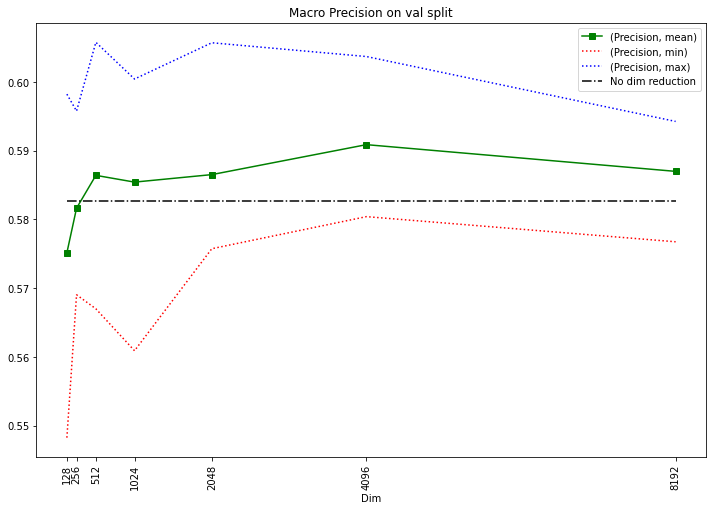

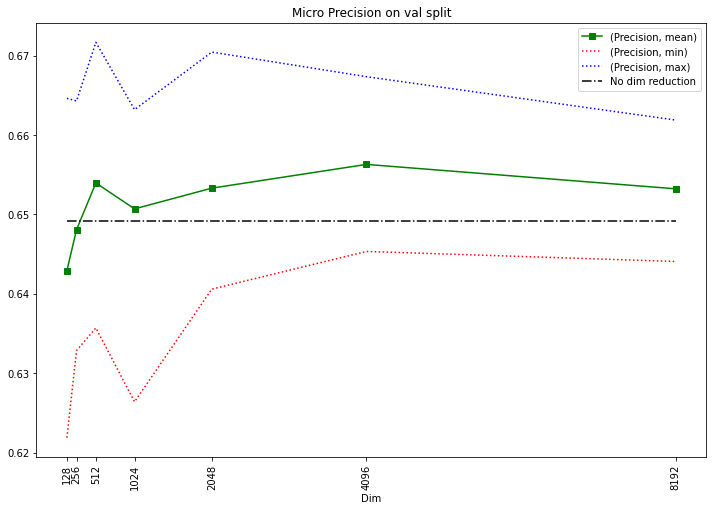

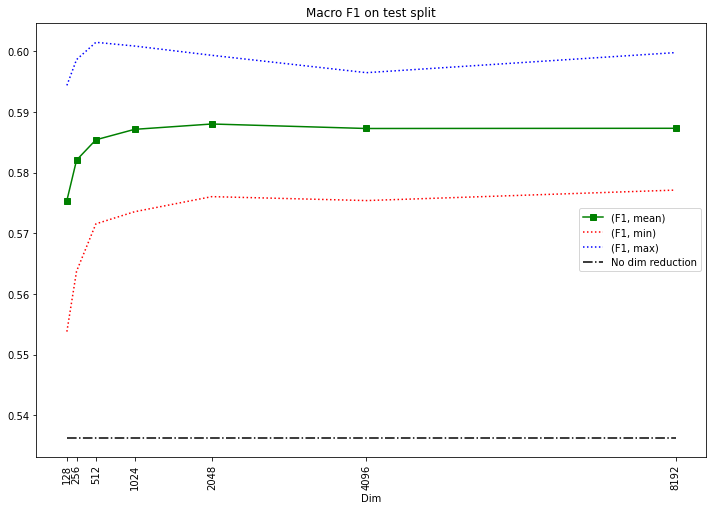

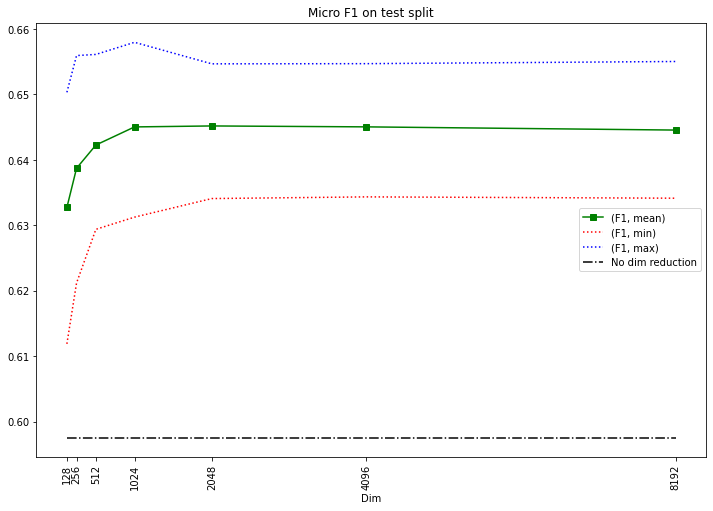

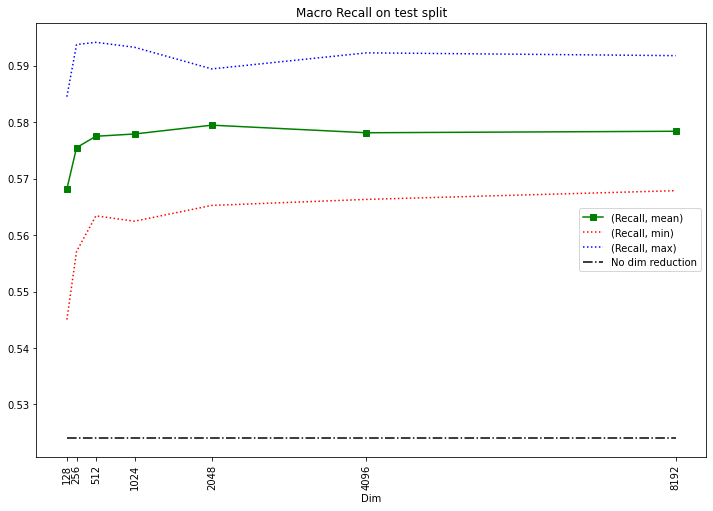

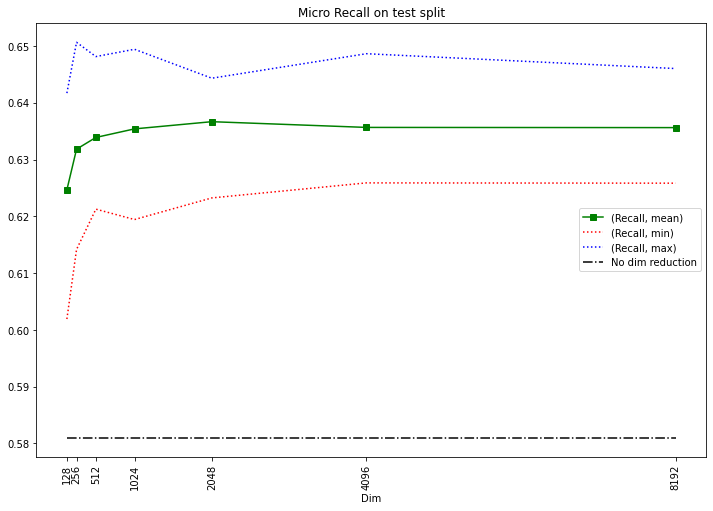

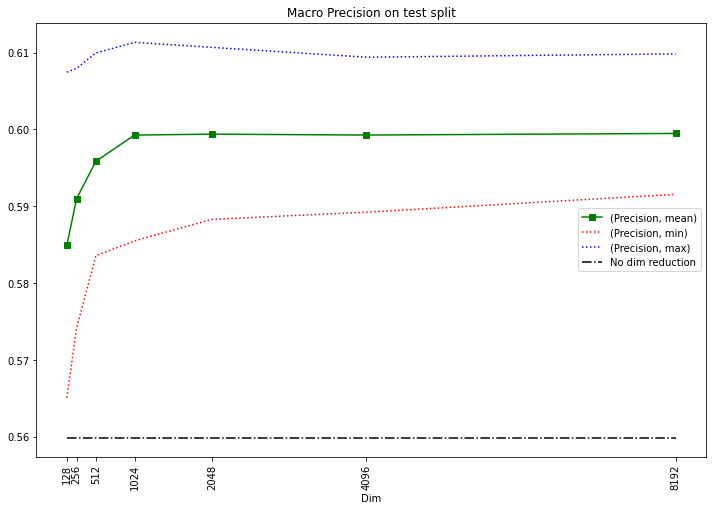

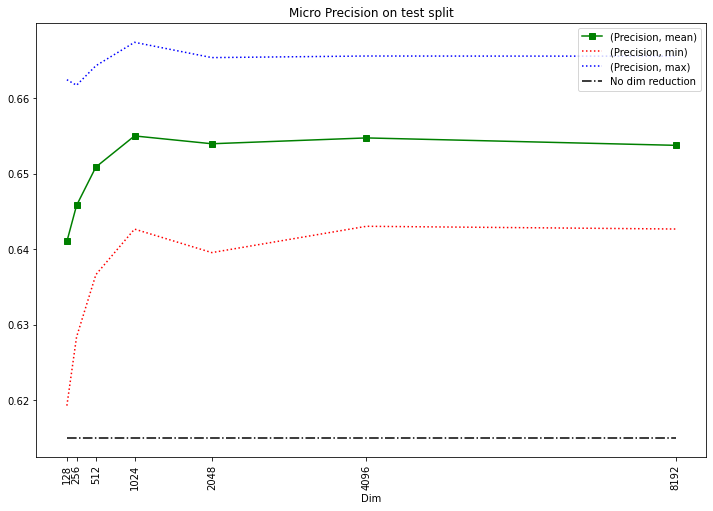

In [52]:
def visualize(data_split, metric, kind):
    data_split = data_split.lower()
    metric = metric[0].upper() + metric[1:].lower()
    kind = kind[0].upper() + kind[1:].lower()
    baseline = no_reduction[data_split][metric][kind]
    df = process_into_df(data_split)
    ax = df[df['Diagnosis'] == kind].groupby('Dim').agg({
        metric: ['mean', 'min', 'max'],
    }).plot(
        kind='line',
        # logx=True, 
        style=['gs-', 'r:', 'b:', ], 
        xticks=df['Dim'].unique(),
        figsize=(12, 8),
        rot=90,
    )

    ax.plot(2**np.arange(7, 14), [baseline]*7, '-.k', label='No dim reduction')
    plt.legend()
    plt.title(f"{kind} {metric} on {data_split} split")

    plt.plot(ax=ax)
    plt.show()

for split in ['val', 'test']:
    for metric in ['F1', 'Recall', 'Precision']:
        for kind in ['Macro', 'Micro']:
        
            visualize(split, metric, kind)
            # print(split, kind, metric)